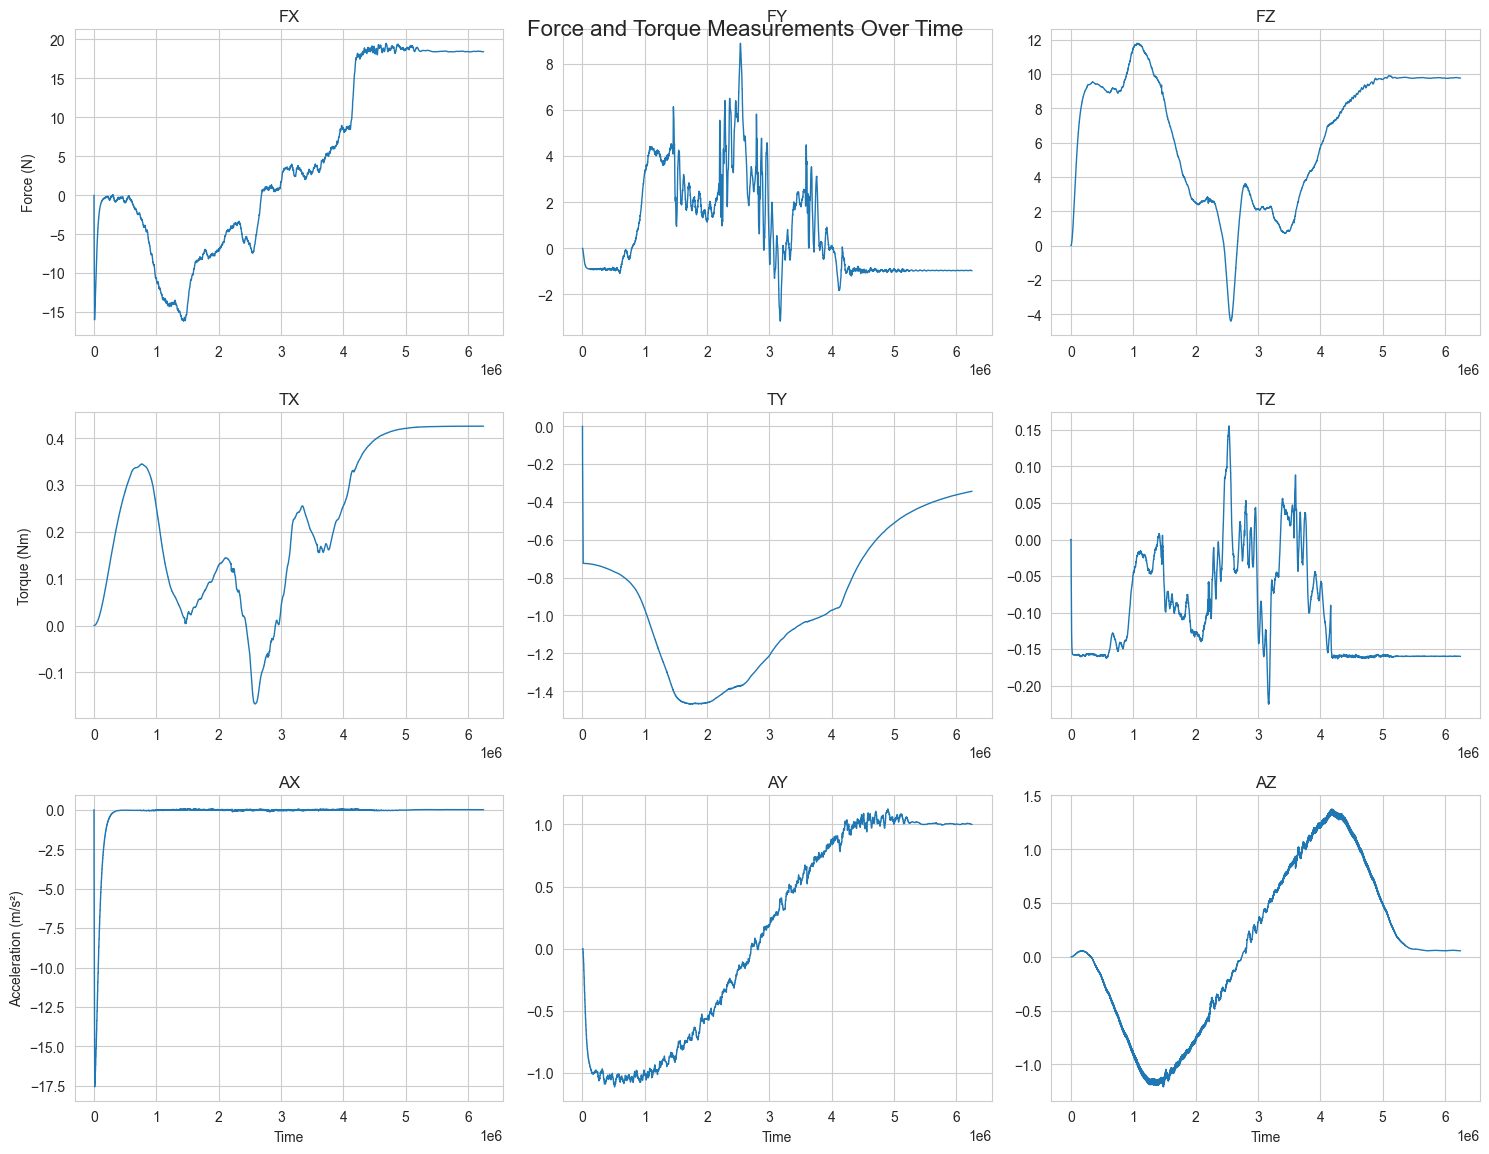

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_force_torque_data(csv_file):
    df = pd.read_csv(csv_file)
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Force and Torque Measurements Over Time', fontsize=16, y=0.95)

    axs_flat = axs.flatten()

    columns_to_plot = ['fx', 'fy', 'fz', 'tx', 'ty', 'tz', 'ax', 'ay', 'az']
    
    for idx, col in enumerate(columns_to_plot):
        ax = axs_flat[idx]
        ax.plot(df['t'], df[col], linewidth=1)
        ax.set_title(f'{col.upper()}')
        ax.grid(True)

        if df[col].abs().max() < 0.001:
             ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

        if idx >= 6:
            ax.set_xlabel('Time')

    axs[0,0].set_ylabel('Force (N)')
    axs[1,0].set_ylabel('Torque (Nm)')
    axs[2,0].set_ylabel('Acceleration (m/s²)')

    plt.tight_layout()
    
    return fig

fig = plot_force_torque_data('Old data/3-Wrench_2.csv')
plt.show()

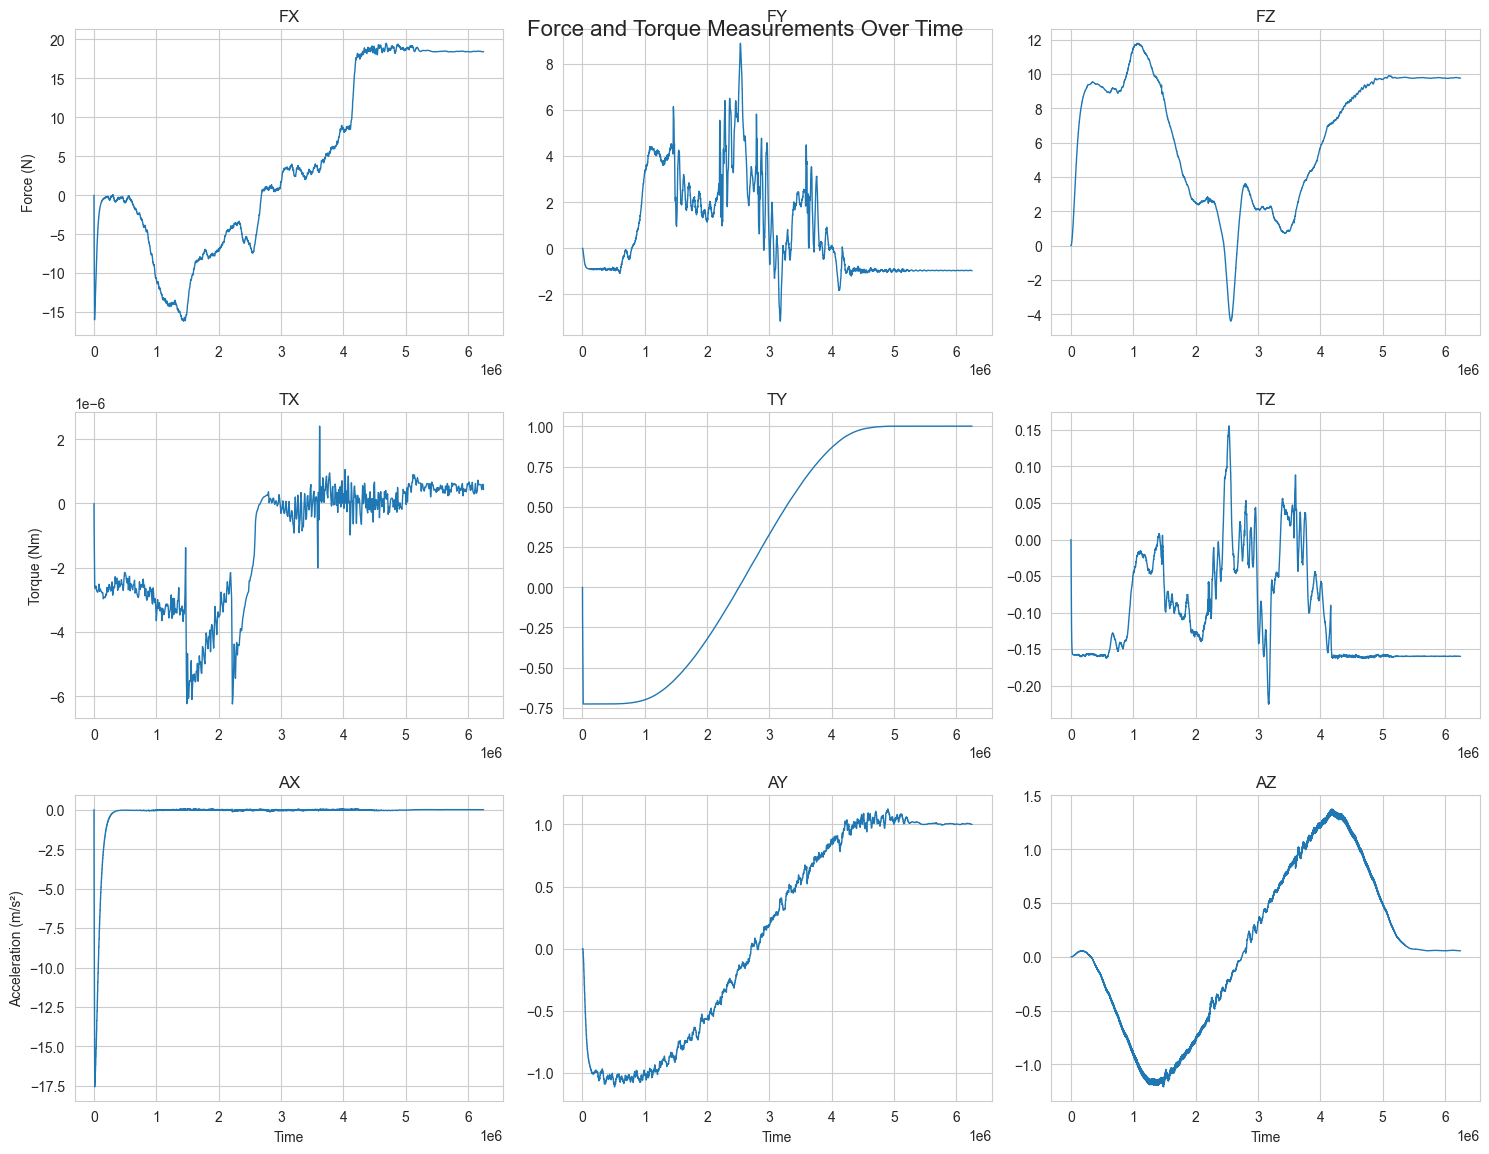

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_force_torque_data(csv_file):
    df = pd.read_csv(csv_file)

    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('Force and Torque Measurements Over Time', fontsize=16, y=0.95)
    axs_flat = axs.flatten()

    columns_to_plot = ['fx', 'fy', 'fz', 'tx', 'ty', 'tz', 'ax', 'ay', 'az']
    
    for idx, col in enumerate(columns_to_plot):
        ax = axs_flat[idx]
        ax.plot(df['t'], df[col], linewidth=1)
        ax.set_title(f'{col.upper()}')
        ax.grid(True)

        if df[col].abs().max() < 0.001:
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

        if idx >= 6:
            ax.set_xlabel('Time')

    axs[0,0].set_ylabel('Force (N)')
    axs[1,0].set_ylabel('Torque (Nm)')
    axs[2,0].set_ylabel('Acceleration (m/s²)')

    plt.tight_layout()
    
    return fig

fig = plot_force_torque_data('3-Test3.csv')
plt.show()

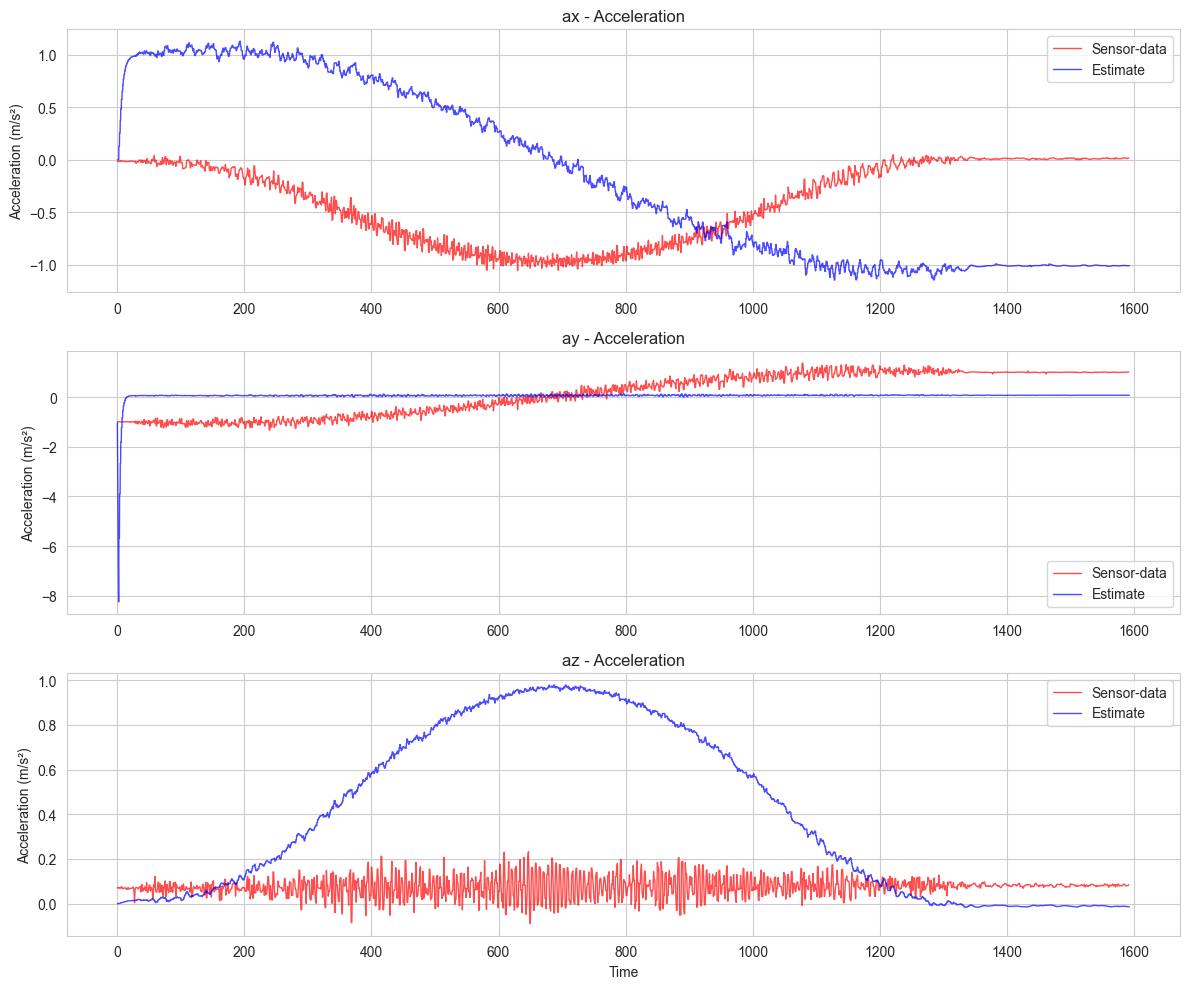

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, ft_stretch_factor=0.5):

    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))


    acceleration_components = ['ax', 'ay', 'az']
    
    for idx, component in enumerate(acceleration_components):
        axs[idx].plot(vib_time, 
                     df_vib[component],
                     label='Sensor-data',
                     color='red',
                     alpha=0.7,
                     linewidth=1)

        axs[idx].plot(ft_time, 
                     df_ft[component],
                     label='Estimate',
                     color='blue',
                     alpha=0.7,
                     linewidth=1)
        
        axs[idx].set_title(f'{component} - Acceleration')
        axs[idx].grid(True)
        axs[idx].legend()
        

        if df_ft[component].abs().max() < 0.001:
            axs[idx].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        

        axs[idx].set_ylabel('Acceleration (m/s²)')
    axs[-1].set_xlabel('Time')

    plt.tight_layout()
    
    return fig

# Example usage
fig = plot_combined_data('1-FTS.csv', '1-baseline_accel.csv')
plt.show()

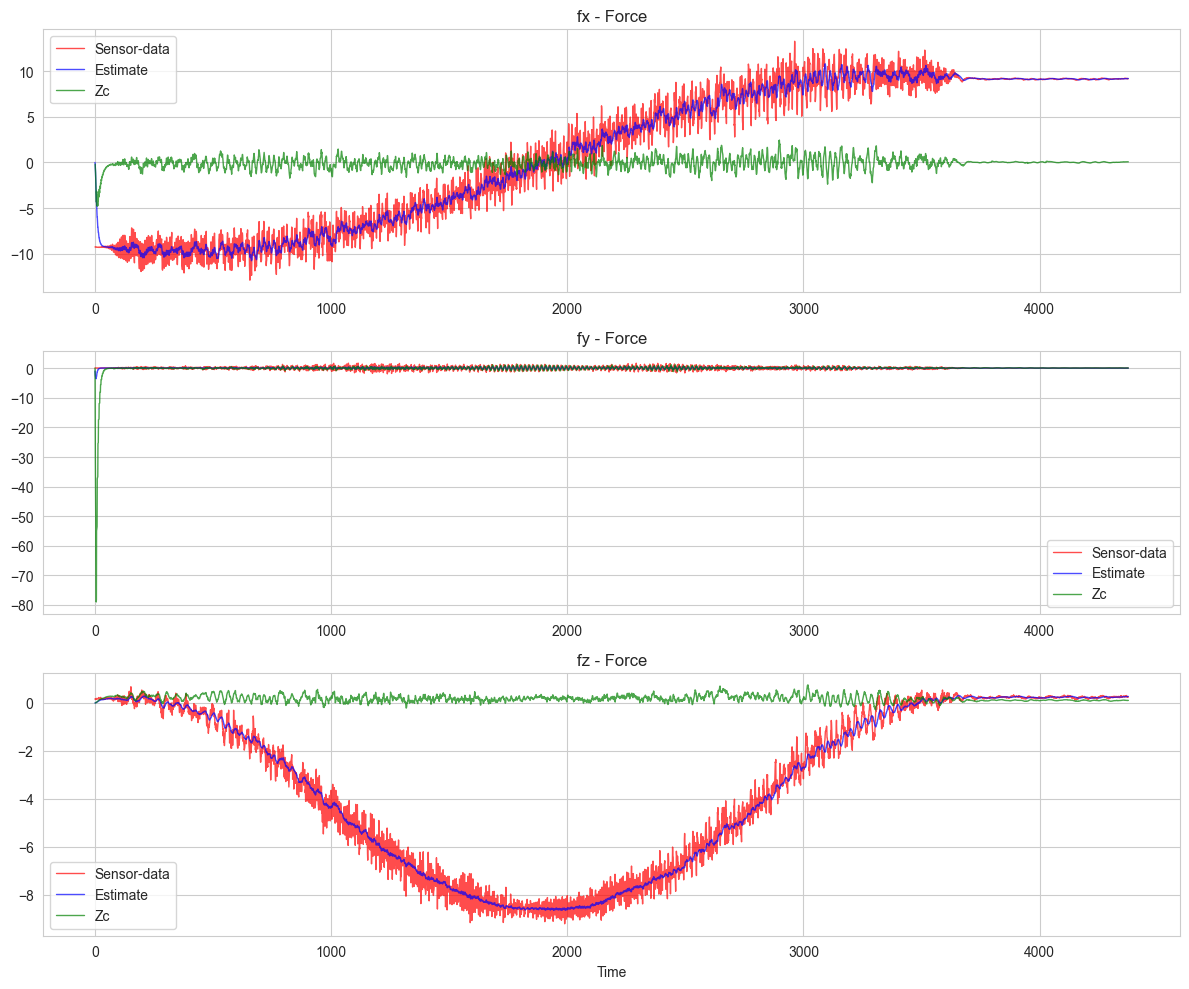

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, zc_csv,ft_stretch_factor=0.5):
    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)
    df_zc = pd.read_csv(zc_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))
    zc_time = np.linspace(0, len(df_vib), len(df_zc))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    force_components = ['fx', 'fy', 'fz']



    axs[0].plot(vib_time, 
                 df_vib[force_components[0]]-9.07633,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(vib_time, 
                 df_vib[force_components[1]]- -1.01814,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(vib_time, 
                 df_vib[force_components[2]]-9.98482,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)


    
    axs[0].plot(ft_time, 
                 df_ft[force_components[0]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(ft_time, 
                 df_ft[force_components[1]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(ft_time, 
                 df_ft[force_components[2]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    
    axs[0].plot(zc_time, 
                 df_zc[force_components[0]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(zc_time, 
                 df_zc[force_components[1]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(zc_time, 
                 df_zc[force_components[2]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
        
    axs[0].set_title(f'{force_components[0]} - Force')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].set_title(f'{force_components[1]} - Force')
    axs[1].grid(True)
    axs[1].legend()
    
    axs[2].set_title(f'{force_components[2]} - Force')
    axs[2].grid(True)
    axs[2].legend()

 
    axs[-1].set_xlabel('Time')
    

    plt.tight_layout()
    
    return fig


fig = plot_combined_data('1-FTS_unbias.csv', '1-baseline_wrench.csv','1-Zc_unbias.csv')
plt.show()

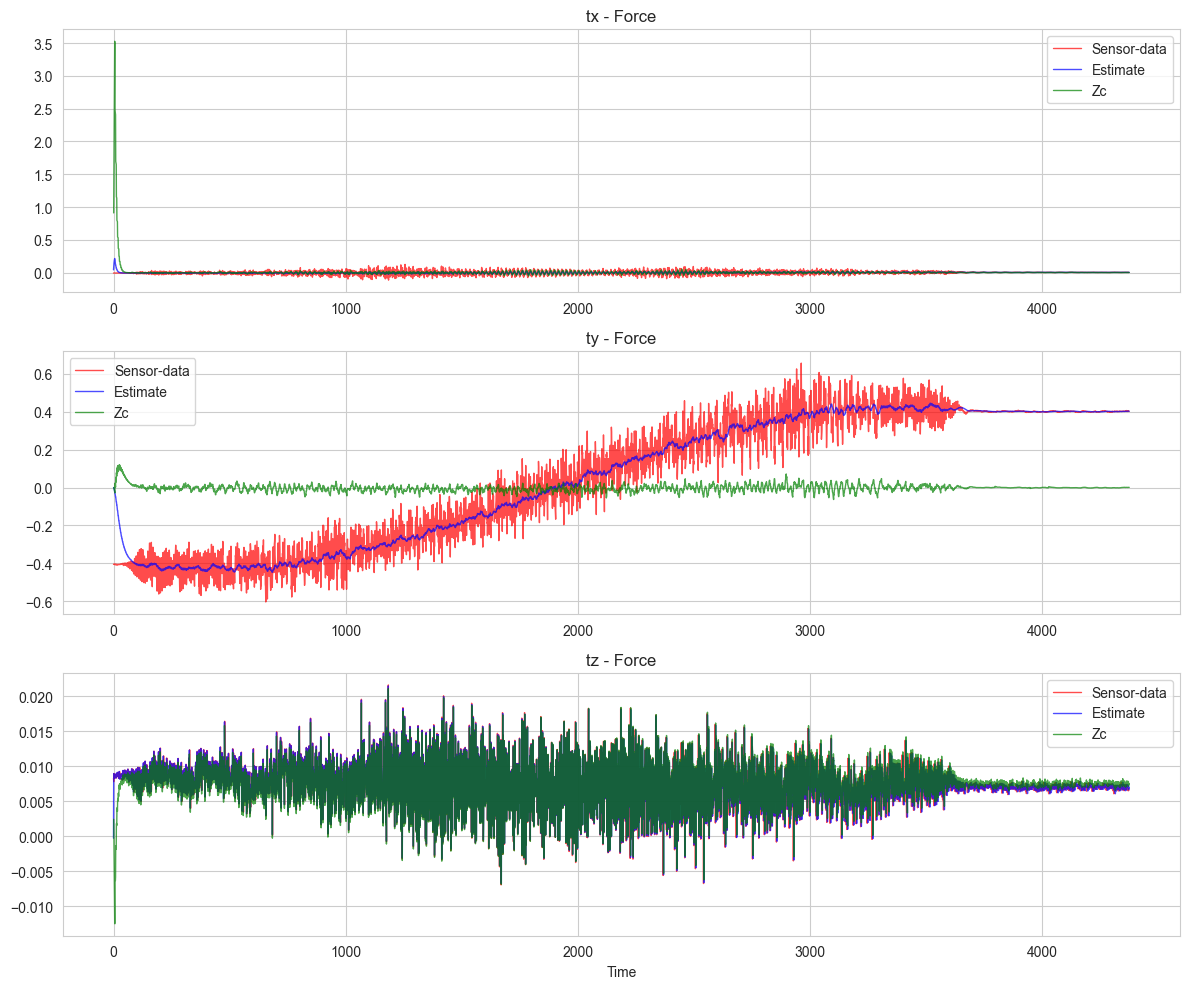

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, zc_csv,ft_stretch_factor=0.5):
    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)
    df_zc = pd.read_csv(zc_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))
    zc_time = np.linspace(0, len(df_vib), len(df_zc))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    force_components = ['tx', 'ty', 'tz']



    axs[0].plot(vib_time, 
                 df_vib[force_components[0]]-0.432449,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(vib_time, 
                 df_vib[force_components[1]]- -0.692162,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(vib_time, 
                 df_vib[force_components[2]]- -0.156746,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)


    
    axs[0].plot(ft_time, 
                 df_ft[force_components[0]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(ft_time, 
                 df_ft[force_components[1]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(ft_time, 
                 df_ft[force_components[2]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    
    axs[0].plot(zc_time, 
                 df_zc[force_components[0]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(zc_time, 
                 df_zc[force_components[1]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(zc_time, 
                 df_zc[force_components[2]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
        
    axs[0].set_title(f'{force_components[0]} - Force')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].set_title(f'{force_components[1]} - Force')
    axs[1].grid(True)
    axs[1].legend()
    
    axs[2].set_title(f'{force_components[2]} - Force')
    axs[2].grid(True)
    axs[2].legend()

 
    axs[-1].set_xlabel('Time')
    

    plt.tight_layout()
    
    return fig


fig = plot_combined_data('1-FTS_unbias.csv', '1-baseline_wrench.csv','1-Zc_unbias.csv')
plt.show()

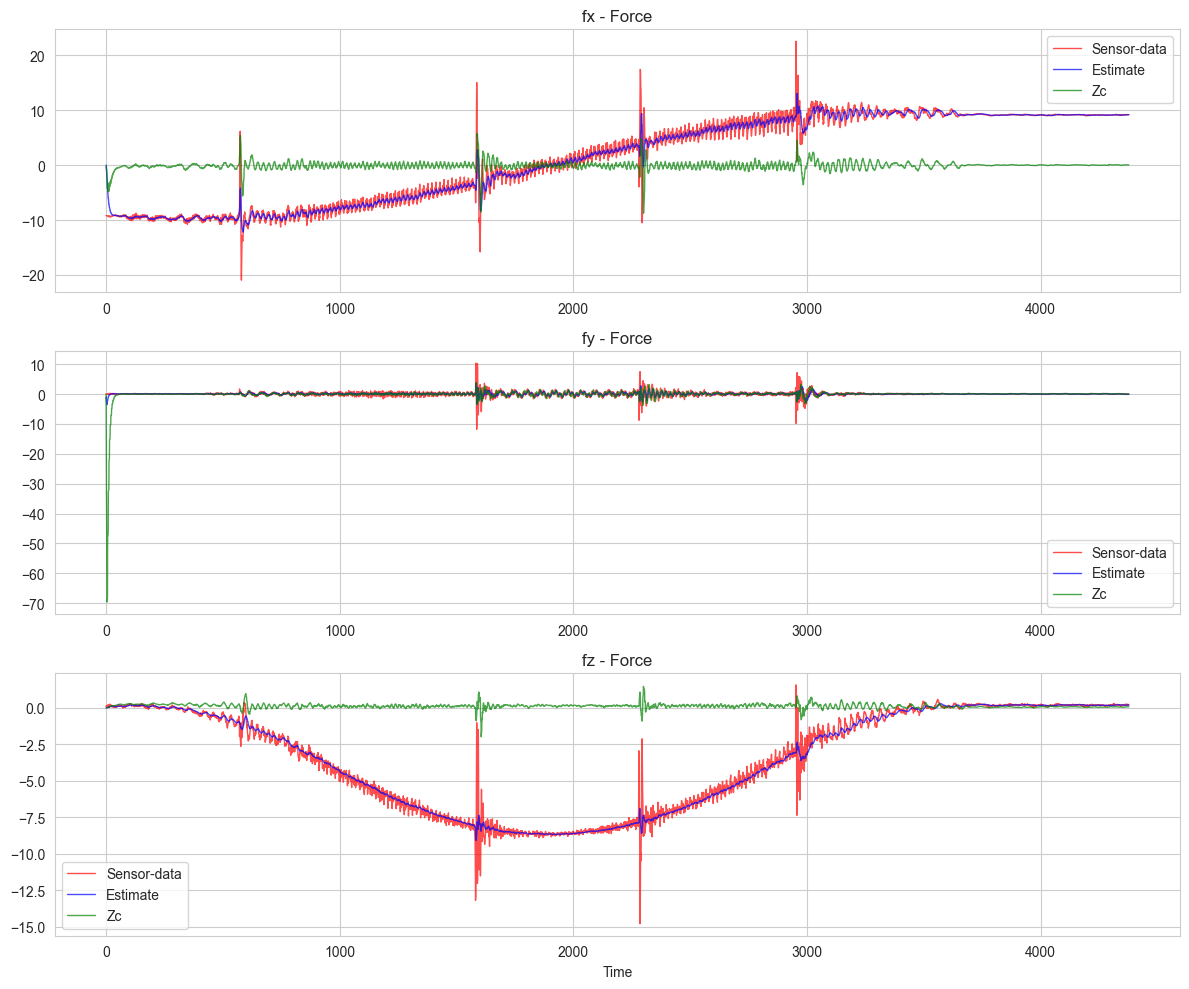

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, zc_csv,ft_stretch_factor=0.5):
    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)
    df_zc = pd.read_csv(zc_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))
    zc_time = np.linspace(0, len(df_vib), len(df_zc))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    force_components = ['fx', 'fy', 'fz']



    axs[0].plot(vib_time, 
                 df_vib[force_components[0]]-9.07633,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(vib_time, 
                 df_vib[force_components[1]]- -1.01814,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(vib_time, 
                 df_vib[force_components[2]]-9.98482,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)


    
    axs[0].plot(ft_time, 
                 df_ft[force_components[0]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(ft_time, 
                 df_ft[force_components[1]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(ft_time, 
                 df_ft[force_components[2]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    
    axs[0].plot(zc_time, 
                 df_zc[force_components[0]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(zc_time, 
                 df_zc[force_components[1]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(zc_time, 
                 df_zc[force_components[2]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
        
    axs[0].set_title(f'{force_components[0]} - Force')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].set_title(f'{force_components[1]} - Force')
    axs[1].grid(True)
    axs[1].legend()
    
    axs[2].set_title(f'{force_components[2]} - Force')
    axs[2].grid(True)
    axs[2].legend()

 
    axs[-1].set_xlabel('Time')
    

    plt.tight_layout()
    
    return fig


fig = plot_combined_data('2-FTS_unbias.csv', '2-vibrations_wrench.csv','2-Zc_unbias.csv')
plt.show()

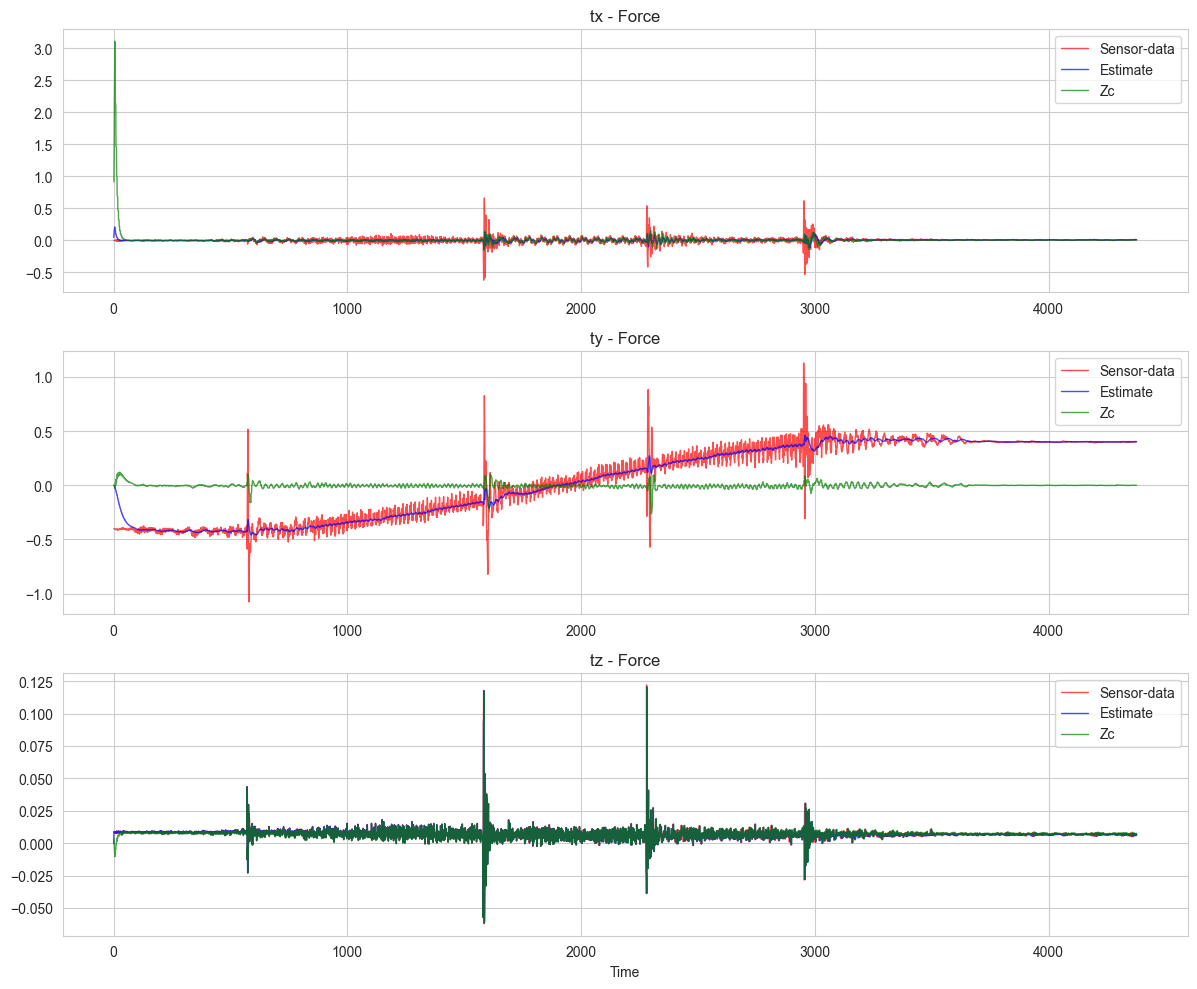

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, zc_csv,ft_stretch_factor=0.5):
    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)
    df_zc = pd.read_csv(zc_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))
    zc_time = np.linspace(0, len(df_vib), len(df_zc))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    force_components = ['tx', 'ty', 'tz']



    axs[0].plot(vib_time, 
                 df_vib[force_components[0]]-0.432449,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(vib_time, 
                 df_vib[force_components[1]]- -0.692162,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(vib_time, 
                 df_vib[force_components[2]]- -0.156746,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)


    
    axs[0].plot(ft_time, 
                 df_ft[force_components[0]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(ft_time, 
                 df_ft[force_components[1]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(ft_time, 
                 df_ft[force_components[2]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    
    axs[0].plot(zc_time, 
                 df_zc[force_components[0]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(zc_time, 
                 df_zc[force_components[1]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(zc_time, 
                 df_zc[force_components[2]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
        
    axs[0].set_title(f'{force_components[0]} - Force')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].set_title(f'{force_components[1]} - Force')
    axs[1].grid(True)
    axs[1].legend()
    
    axs[2].set_title(f'{force_components[2]} - Force')
    axs[2].grid(True)
    axs[2].legend()

 
    axs[-1].set_xlabel('Time')
    

    plt.tight_layout()
    
    return fig


fig = plot_combined_data('2-FTS_unbias.csv', '2-vibrations_wrench.csv','2-Zc_unbias.csv')
plt.show()

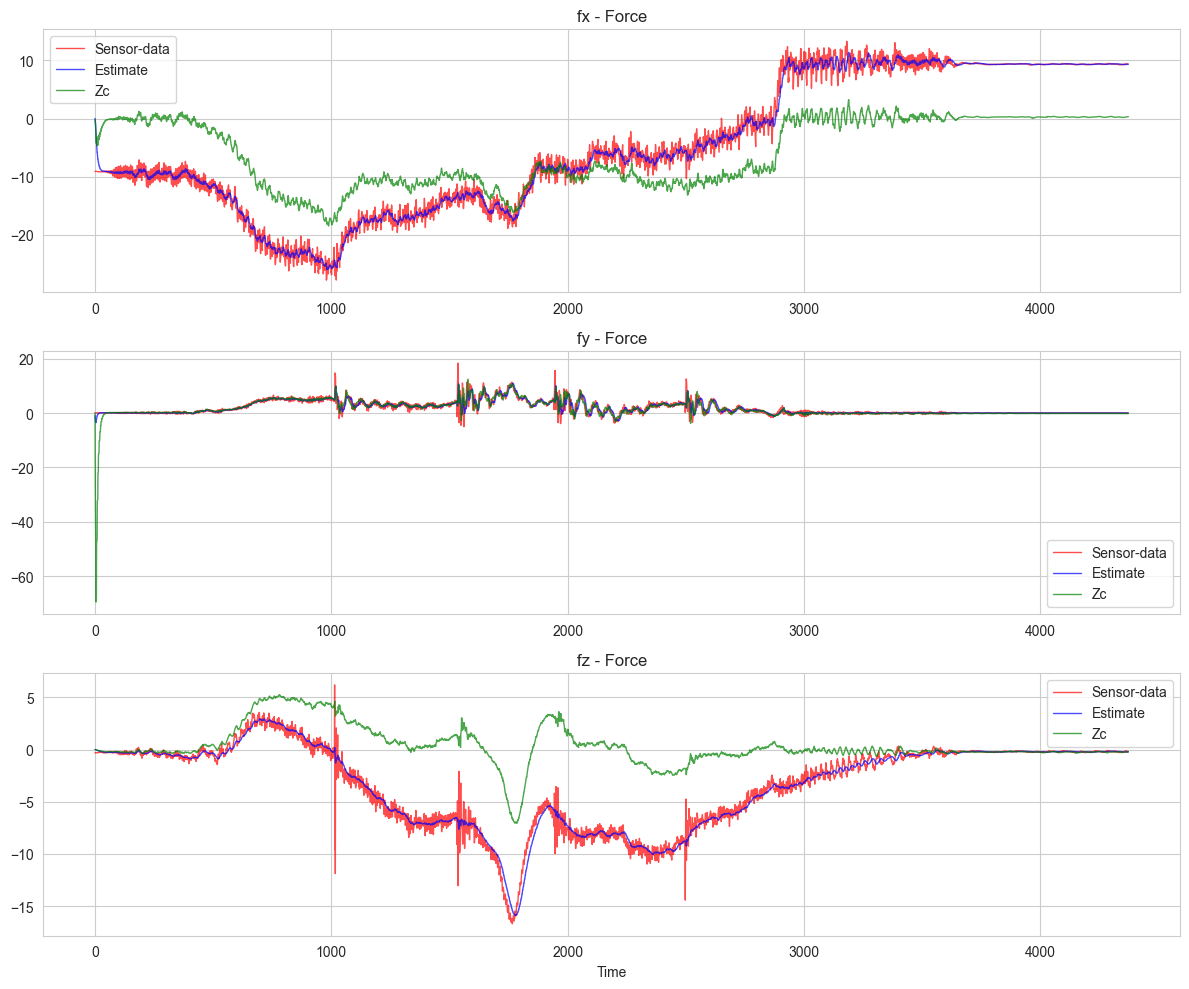

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, zc_csv,ft_stretch_factor=0.5):
    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)
    df_zc = pd.read_csv(zc_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))
    zc_time = np.linspace(0, len(df_vib), len(df_zc))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    force_components = ['fx', 'fy', 'fz']



    axs[0].plot(vib_time, 
                 df_vib[force_components[0]]-9.07633,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(vib_time, 
                 df_vib[force_components[1]]- -1.01814,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(vib_time, 
                 df_vib[force_components[2]]-9.98482,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)


    
    axs[0].plot(ft_time, 
                 df_ft[force_components[0]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(ft_time, 
                 df_ft[force_components[1]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(ft_time, 
                 df_ft[force_components[2]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    
    axs[0].plot(zc_time, 
                 df_zc[force_components[0]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(zc_time, 
                 df_zc[force_components[1]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(zc_time, 
                 df_zc[force_components[2]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
        
    axs[0].set_title(f'{force_components[0]} - Force')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].set_title(f'{force_components[1]} - Force')
    axs[1].grid(True)
    axs[1].legend()
    
    axs[2].set_title(f'{force_components[2]} - Force')
    axs[2].grid(True)
    axs[2].legend()

 
    axs[-1].set_xlabel('Time')
    

    plt.tight_layout()
    
    return fig


fig = plot_combined_data('3-FTS_unbias.csv', '3-vibrations-contact_wrench.csv','3-Zc_unbias.csv')
plt.show()

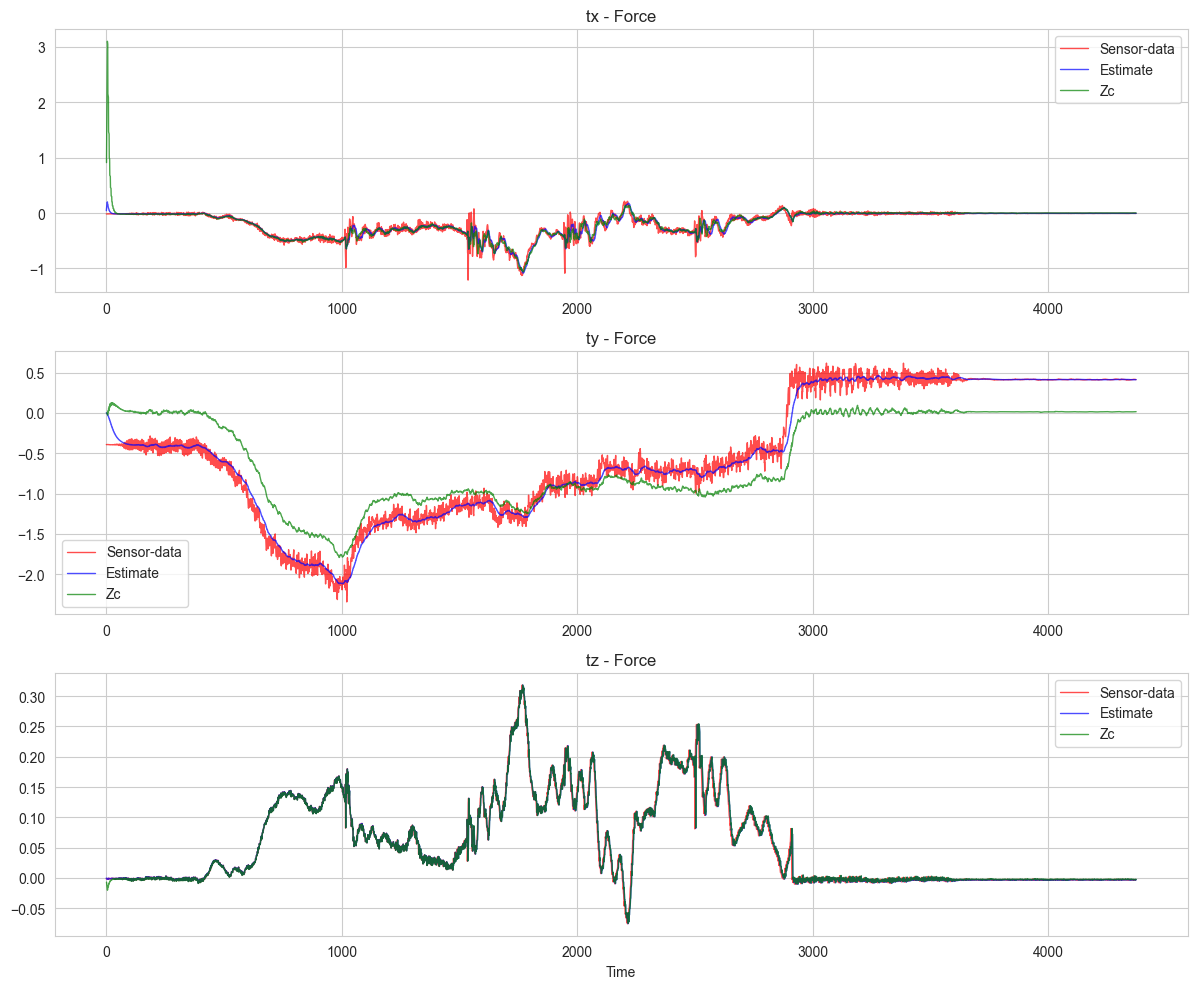

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_data(force_torque_csv, vibrations_csv, zc_csv,ft_stretch_factor=0.5):
    df_ft = pd.read_csv(force_torque_csv)
    df_vib = pd.read_csv(vibrations_csv)
    df_zc = pd.read_csv(zc_csv)

    vib_time = np.arange(len(df_vib))
    ft_time = np.linspace(0, len(df_vib), len(df_ft))
    zc_time = np.linspace(0, len(df_vib), len(df_zc))

    fig, axs = plt.subplots(3, 1, figsize=(12, 10))

    force_components = ['tx', 'ty', 'tz']



    axs[0].plot(vib_time, 
                 df_vib[force_components[0]]-0.432449,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(vib_time, 
                 df_vib[force_components[1]]- -0.692162,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(vib_time, 
                 df_vib[force_components[2]]- -0.156746,
                 label='Sensor-data',
                 color='red',
                 alpha=0.7,
                 linewidth=1)


    
    axs[0].plot(ft_time, 
                 df_ft[force_components[0]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(ft_time, 
                 df_ft[force_components[1]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(ft_time, 
                 df_ft[force_components[2]],
                 label='Estimate',
                 color='blue',
                 alpha=0.7,
                 linewidth=1)
    
    axs[0].plot(zc_time, 
                 df_zc[force_components[0]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[1].plot(zc_time, 
                 df_zc[force_components[1]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
    axs[2].plot(zc_time, 
                 df_zc[force_components[2]],
                 label='Zc',
                 color='green',
                 alpha=0.7,
                 linewidth=1)
        
    axs[0].set_title(f'{force_components[0]} - Force')
    axs[0].grid(True)
    axs[0].legend()
    
    axs[1].set_title(f'{force_components[1]} - Force')
    axs[1].grid(True)
    axs[1].legend()
    
    axs[2].set_title(f'{force_components[2]} - Force')
    axs[2].grid(True)
    axs[2].legend()

 
    axs[-1].set_xlabel('Time')
    

    plt.tight_layout()
    
    return fig


fig = plot_combined_data('3-FTS_unbias.csv', '3-vibrations-contact_wrench.csv','3-Zc_unbias.csv')
plt.show()